## 1. Zaimportowanie danych i bibliotek

In [7]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('heart_disease_dataset.csv')

## 2. Missing values
Na początek zajmijmy się "Missing values". Sprawdźmy czy jakieś są i zastanówmy się jak sobie z nimi poradzić

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Widzimy, że zarówno w zmiennej ca, jak i thal mamy bardzo odstające wartości, co możę sugerować, ze mamy do czynienai z specyficznym oznaczeniem ich. Spróbujmy je wyeliminować w sposób, który najmniej zaburzy nam dataset. Jako, że są to zmienne, które nei są ciągłe i samych braków nie jest dużo, zdecydowałem się na usunięcie wierszy z brakujacymi danymi.

In [10]:
data_removed = data[(data.ca != -100000) & (data.thal != -100000)]
data_removed.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Sprawdźmy, jak różnią się w zależnosći w data frame'ach z usuniętymi i pozostawionymi rekordami.

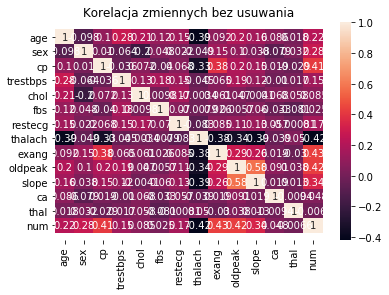

In [11]:
corr = data.corr()
ax = sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja zmiennych bez usuwania')
plt.rcParams["figure.figsize"] = 20,20
plt.show()

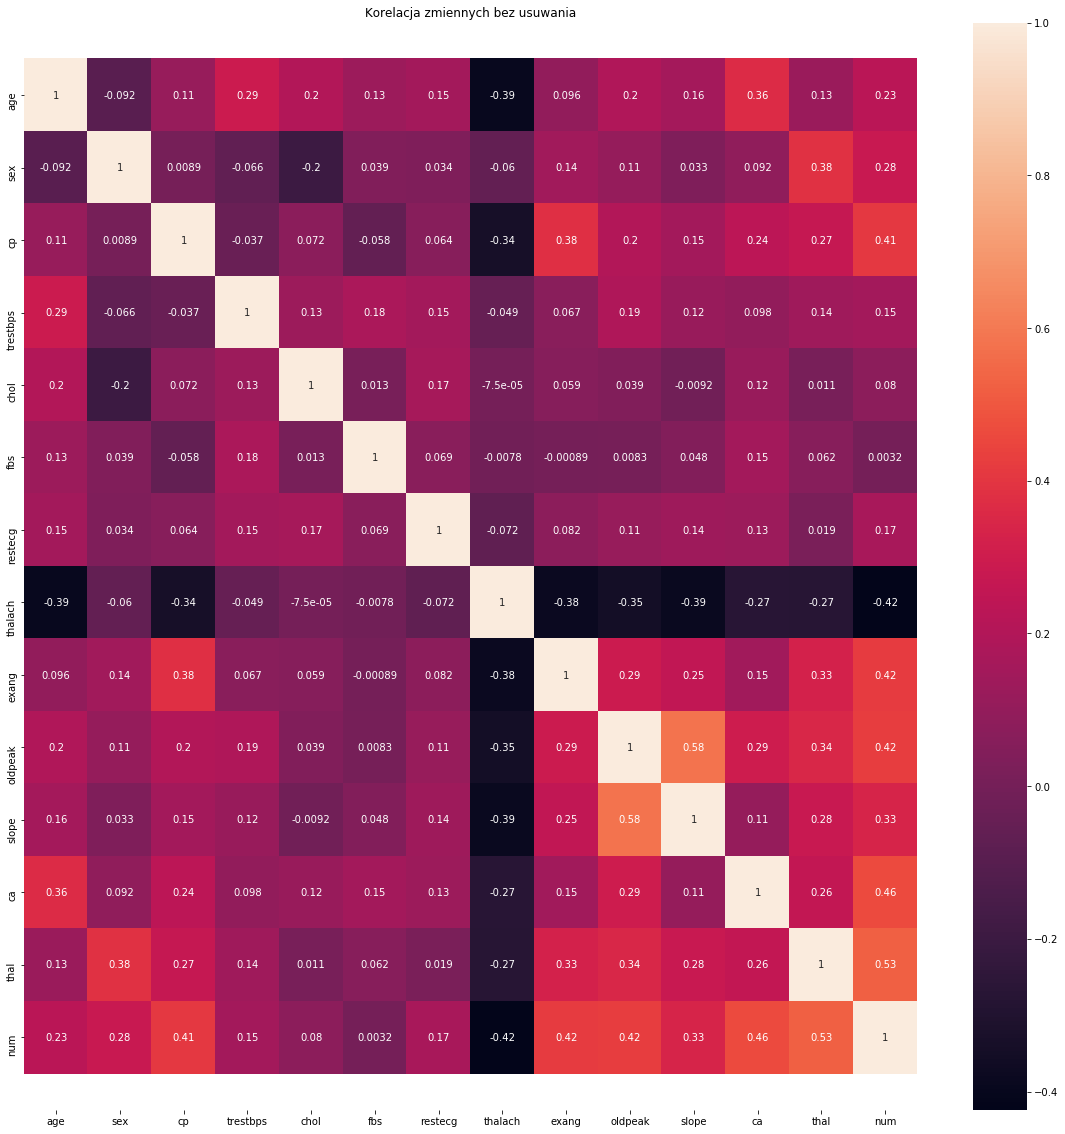

In [12]:
corr = data_removed.corr()
ax = sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja zmiennych bez usuwania')
plt.rcParams["figure.figsize"] = 20,20
plt.show()

Widzimy, że heatmapa korealcji zasadniczo różni się dla 2 podejść. Wydaje mi się, że podejście z usunieciem rekordów jest dużo bardziej poprawne, ponieważ brakujące dane były przedstawione za pomocą liczb, które nie miały zupełnei sensu i zaburzały macierz korelacji. Dlatego w dalszej części bedziemy operować na danych z usuniętymi wierszami.

## 3. Zależność slope - oldpeak
Zajmijmy się zależnoscią o największym współczynniku korelacji slope - oldpeak

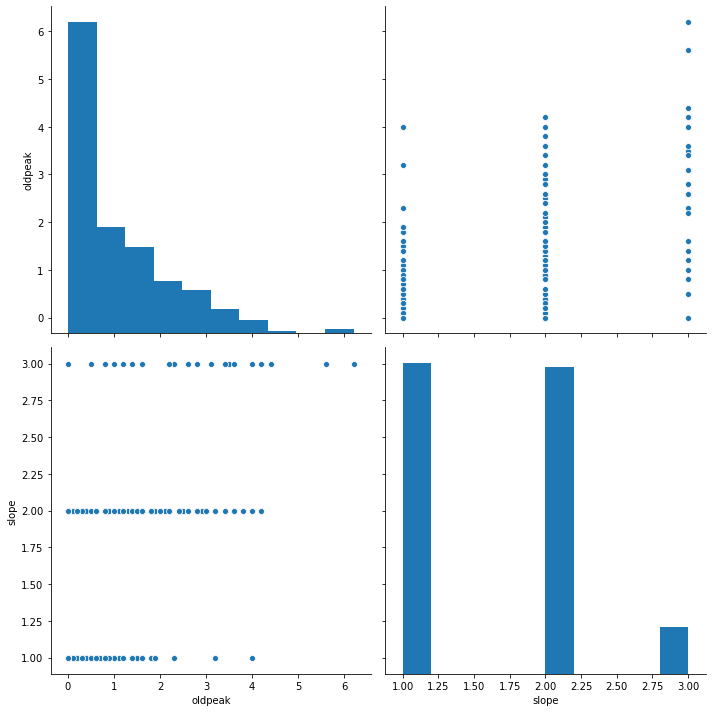

In [13]:
sns.pairplot(data_removed.loc[:,["oldpeak","slope"]], size=5)
plt.tight_layout()

# zmienna oldpeak ma rozkład ekspotencjalny
# jako, ze ma rozkład ekspotencjalny, na pewno znajdą się jakeiś outliery

### 3.1. Outliery dla zmiennej oldpeak

Text(0.5, 1.0, 'Boxplot zmiennej oldpeak')

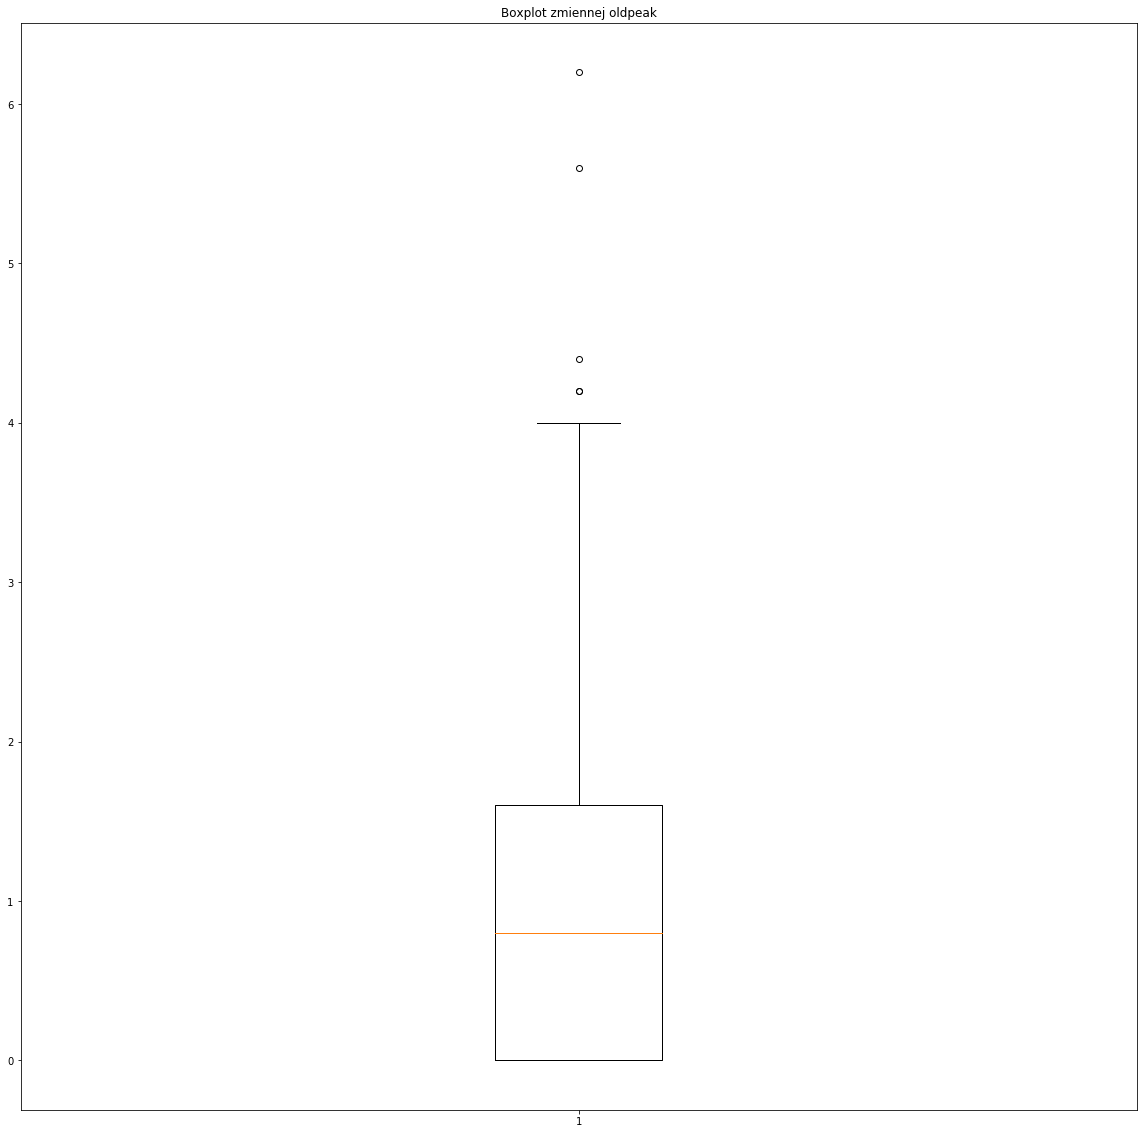

In [14]:
plt.boxplot(data_removed.oldpeak)
plt.title("Boxplot zmiennej oldpeak")
# widzimy, ze jest kilka outlierów

Text(0.5, 1.0, 'Rozrzut zmiennej slope w zależności od zmiennej oldpeak')

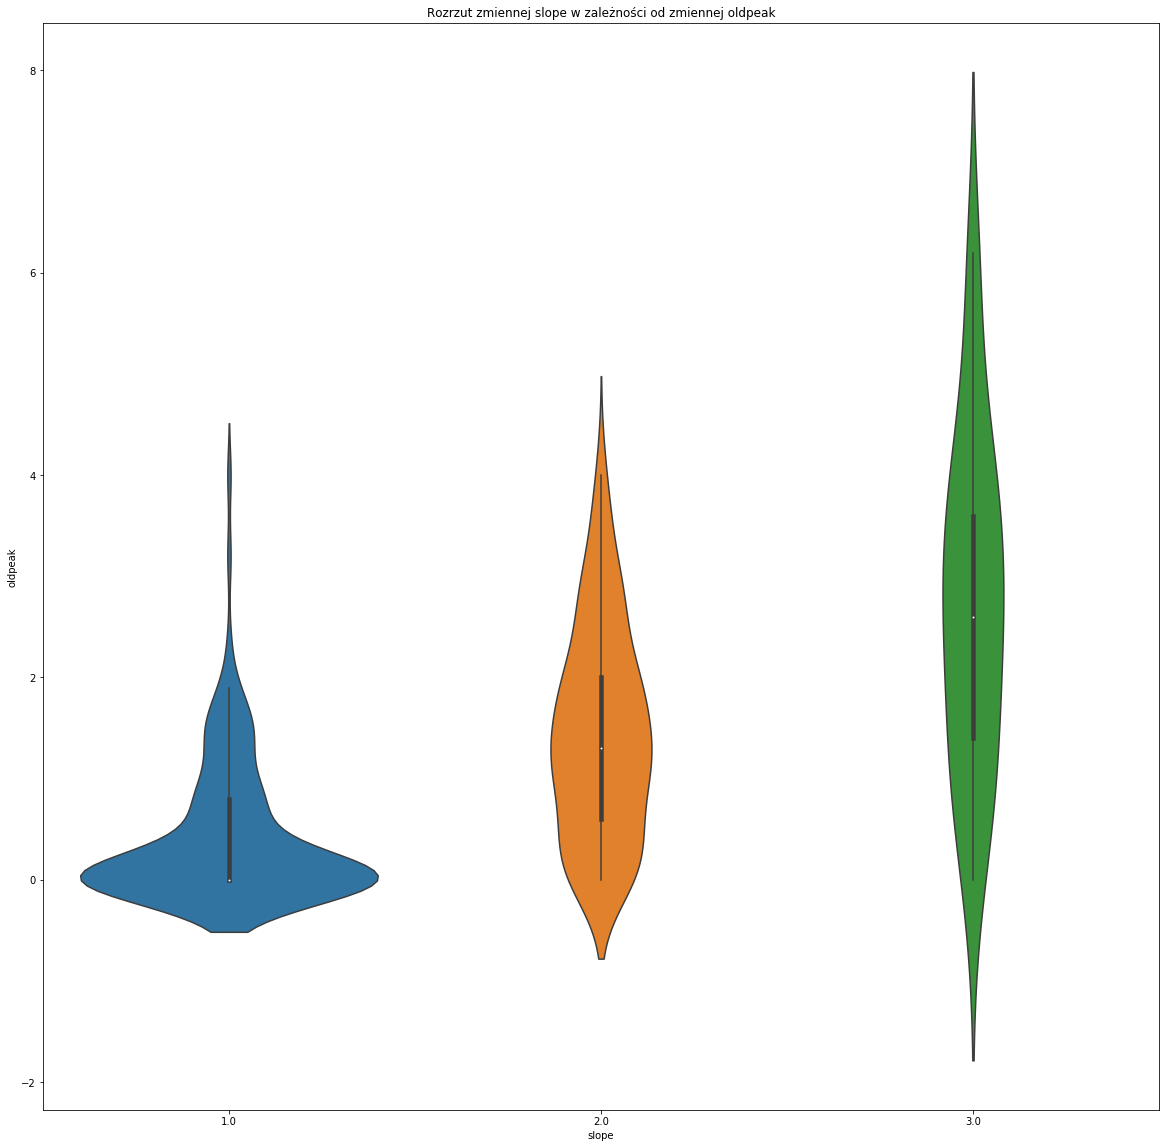

In [15]:
oldpeak_slope = data_removed.iloc[:,[9,10]]
sns.violinplot(oldpeak_slope.slope,oldpeak_slope.oldpeak)
plt.title("Rozrzut zmiennej slope w zależności od zmiennej oldpeak")
# po wyrkesach skrzypcowych również widać zależnosć pomiiędzy tymi oab zmiennymi, bo widzimy,
# ze w zaleznosci od kategorii zmiennej slope, zmienna oldpeak ma różną gestosc

## 4. Rozkład zmiennych ciągłych
Z danych z datasetu widać, że rozkłady ciągłe mają zmienne: age, trestbps, chol, thalach, oldpeak.
Przedstawmy graficznie ich histogramy oraz linię gęstosci

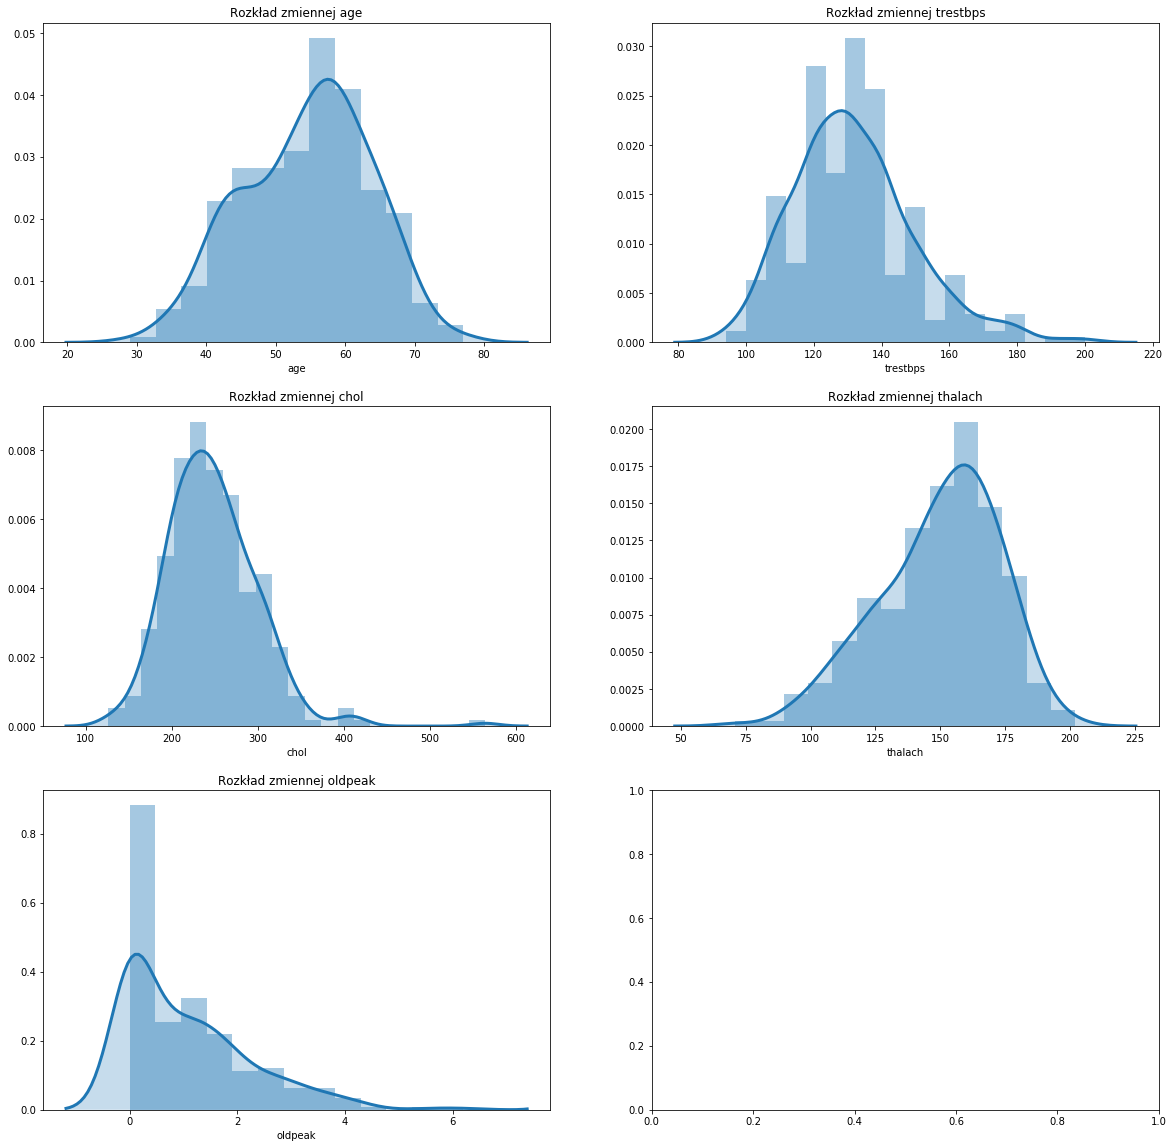

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=3)
variables = ["age",'trestbps','chol','thalach','oldpeak']
plot_number = 0
# Rysowanie wykresów w pętli 
for i in variables:
    plot_dens = sns.distplot(data_removed[i], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                         ax = axs[ plot_number//2, plot_number%2]).set_title("Rozkład zmiennej " + i)
    plot_number += 1 
    
# Widzimy, ze 4 z otrzymanych wykresów przypominają rozkład normalny

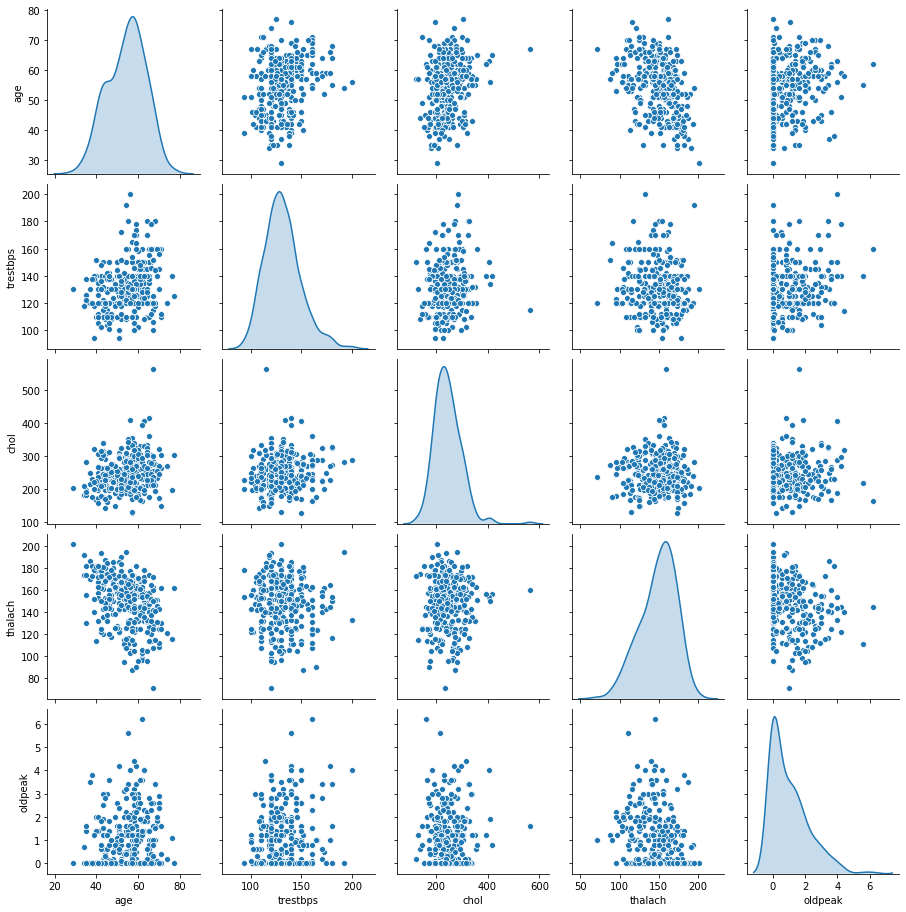

In [17]:
# aby poszukać ręcznie, wizualnie zależnosci mozemy stworzyć wykres zawierający wszystkie zmienne z rozkłądem ciągłym
sns.pairplot(data.loc[:,variables], diag_kind="kde")
# widać, ze ciężko recznie w czyms takim znalezc jakas korelacje

## 5. Zmienna thalach - mocno ujemny współczynnik korelacji
Zajmijmy się interesującą zmienną thalach, która wg macierzy korealcji ma ujemny współczynnik korelacji z wieloma zmiennymi. Sprawdźmy czy to samo wynika z wykresów wiolinowych. Zmienne te to: exang, slope, ca, thal, num

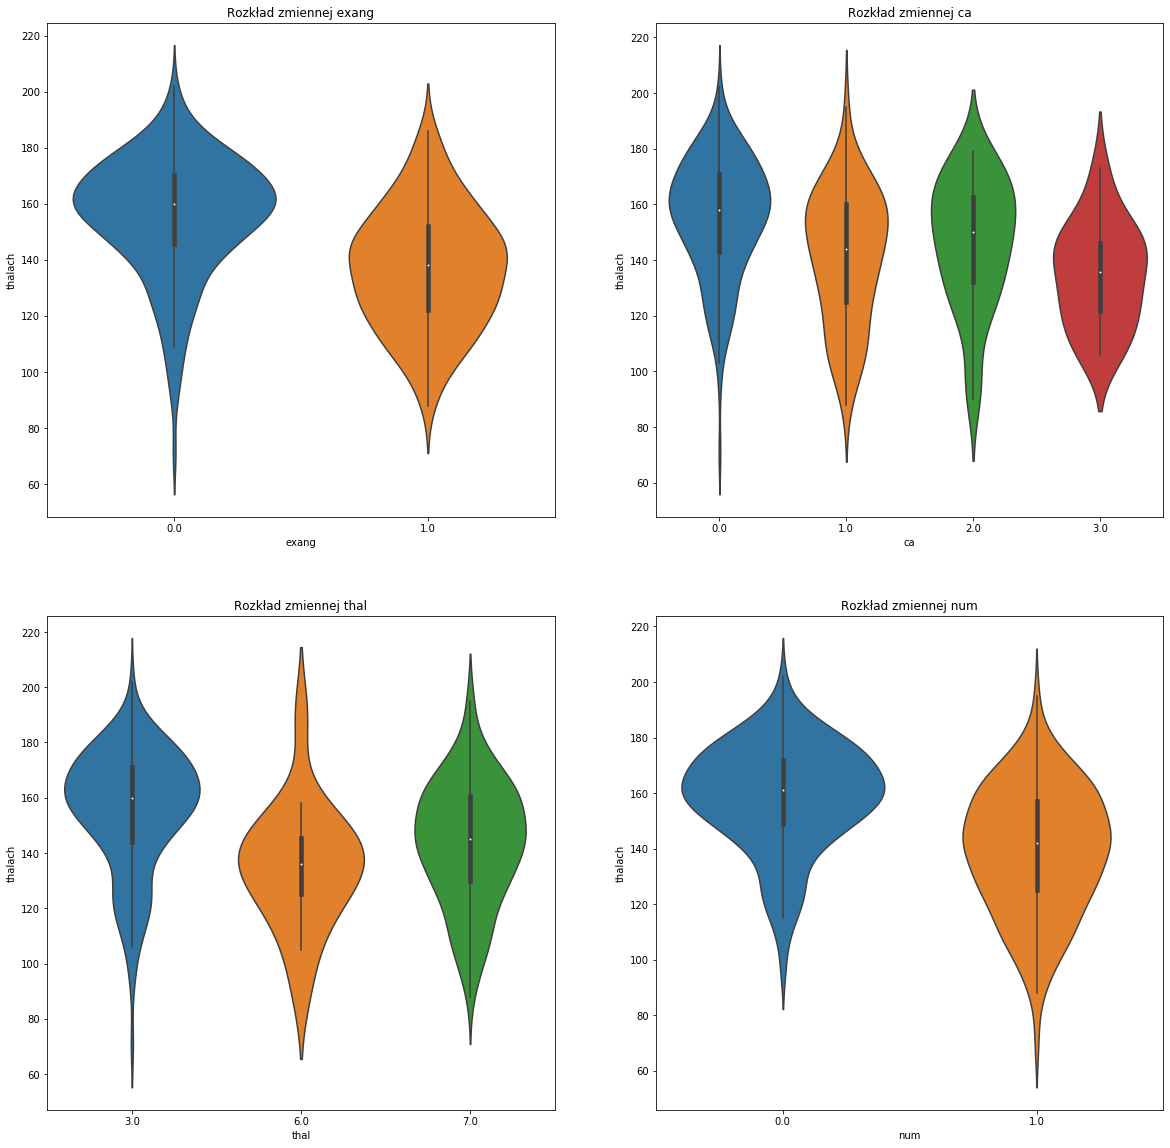

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=2)
variables = ["exang",'ca','thal','num']
plot_number = 0
# Rysowanie wykresów w pętli 
for i in variables:
    plot_dens = sns.violinplot(data_removed[i],data_removed.thalach, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                         ax = axs[ plot_number//2, plot_number%2]).set_title("Rozkład zmiennej " + i)
    plot_number += 1 

Analizując kolejno wykresy możemy dojść do następujacych wniosków:
- Wykres 1.1 - osoby, u których angina była spowodowana ćiczeniami miały mniejsze maksymalne tętno niż te bez związku z ćw.
- Wykres 1.2 - im większa wartość ca, tym mniejsze maksymalne tętno
- Wykres 2.1 - gęstość faktycznie jest różna, ale ciężko wskazać jednoznaczną korelację
- Wykres 2.2 - ludzie o wyższym maksymalnym tętnie byli częściej osobami z chorym sercem

## 6. Automatyczna eksploracja danych

In [19]:
from pandas_profiling import ProfileReport

In [20]:
profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [21]:
profile

Narzędzie bardzo przyadtne, jeżeli zależy nam na czasie. Na etapie na jakim jesteśmy udostępnia nam narzędzia, które w pełni wystarczają, aby dany dataset w jakimś stopniu zrozumieć i znaleźc w nim korelacje i zależności. Jest interaktywne, wiec w ąłtwy sposób mozemy to anrzędzie dostosowywać do swoich potrzeb. Wydaję mi się, ze na etapie, na którym jesteśmy jest to narzędzie abrdzo przydatne, mimo swoich ograniczeń.